1) В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'df has y rows and x columns'
где y – число строк, а x – число колонок.

2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения. Например, для такого датафрэйма: task2_1.png (в папке)
Ответ будет: task2_2.png (в папке)

3) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

4) Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

5) Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

6) А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

7) Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.
Например,
numbers = [1, -2, 3, 0, -3, 2]
Тогда positive_numbers должен быть:
positive_numbers = [1, 3]

8) Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

9) ⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

9.1) ⭐️Задание со звёздочкой!⭐️
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

10) Подумайте, что может влиять на число опозданий из прошлого задания

11) ⭐️Задание со звёздочкой!⭐️
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 

12) ⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 

13) ⭐️Задание со звёздочкой!⭐️
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

14) ⭐️Задание со звёздочкой!⭐️
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения. 
Могут пригодиться:
groupby – группировка
nunique – число уникальных значений
plot.line – линейная диаграмма

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

In [36]:
df = pd.DataFrame({
    'client_id':[1,1,12,12,100],
    'sex':[0,1,0,0,1],
    'wealth':['medium','medium','low','medium','high'],
    'age':[36,43,56,23,30]
})
df

client_id  sex  wealth  age
0          1    0  medium   36
1          1    1  medium   43
2         12    0     low   56
3         12    0  medium   23
4        100    1    high   30

In [37]:
df_shape = 'df has ' + str(df.shape[0]) +' rows and ' + str(df.shape[1]) + ' columns'
df_shape

'df has 5 rows and 4 columns'

In [50]:
df = pd.DataFrame({
    'client_id':[1,1,12,12,100],
    'sex':[0,1,np.nan,0,1],
    'wealth':['medium','medium','low',np.nan,np.nan],
    'age':[36,43,56,23,30]
})
df

client_id  sex  wealth  age
0          1  0.0  medium   36
1          1  1.0  medium   43
2         12  NaN     low   56
3         12  0.0     NaN   23
4        100  1.0     NaN   30

In [51]:
df.isna().sum()

client_id    0
sex          1
wealth       2
age          0
dtype: int64

In [52]:
df_types = df.dtypes
df_types

client_id      int64
sex          float64
wealth        object
age            int64
dtype: object

In [53]:
df.astype({'age':'int'})

client_id  sex  wealth  age
0          1  0.0  medium   36
1          1  1.0  medium   43
2         12  NaN     low   56
3         12  0.0     NaN   23
4        100  1.0     NaN   30

In [54]:
df.dtypes

client_id      int64
sex          float64
wealth        object
age            int64
dtype: object

In [58]:
df = df.drop(columns={'sex','age'})
df

client_id  wealth
0          1  medium
1          1  medium
2         12     low
3         12     NaN
4        100     NaN

In [60]:
df.drop_duplicates(subset = ['client_id'])

client_id  wealth
0          1  medium
2         12     low
4        100     NaN

In [65]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []
for i in numbers:
    if i == 0: break
    if i>0: positive_numbers.append(i)
positive_numbers

[1, 3]

In [74]:
taxi = pd.read_csv('/Users/7101947/Desktop/project/taxi_peru.csv',sep=';')
taxi.dtypes

journey_id           object
user_id              object
driver_id            object
taxi_id              object
icon                 object
start_type           object
start_at             object
start_lat            object
start_lon            object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
source               object
driver_score        float64
rider_score         float64
dtype: object

In [79]:
taxi['start_at'] = pd.to_datetime(taxi.start_at)
taxi['end_at'] = pd.to_datetime(taxi.end_at)
taxi['arrived_at'] = pd.to_datetime(taxi.arrived_at)
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [86]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')
taxi

journey_id                           user_id  \
0      23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1      dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2      dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3      dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4      85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   
...                                 ...                               ...   
23106  4a18ea5737ce0ffecaf20b305a0e2c86  8998bb370b5f0cec43a373adebba0c72   
23107  f1e4317f2c17991dd90d1cd17ae0d399  5f8a6ffef0ea5df78a8ee890267b60ec   
23108  1e44c0fd0a266c3719ff30410b257bce  c0ffb6f6cd801004dd8609c12277c2d1   
23109  7073883383b89ad289e864022150cdd7  c0ffb6f6cd801004dd8609c12277c2d1   
23110  b7dea45c3cc92b9efd5a4905e69ff9bf  c0ffb6f6cd801004dd8609c12277c2d1   

                              driver_id                           taxi_id  \
0      583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN                               NaN   
4      d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   
...                                 ...                               ...   
23106  d665fb9f75ef5d9cd0fd89479380ba78  16cbe35db7fff70fbc8251b4cda9fdc9   
23107  17c21284245ff240c7212732991c2373  716a697375634f32a06d692b0448f13d   
23108  4851ee4c867c9b49b909c1adb76c31e9  4851ee4c867c9b49b909c1adb76c538e   
23109  56f59b58bcbbd1cdabc3652e713134c2  924d4f0e7554566623e8ebb3904a7b0c   
23110  924d4f0e7554566623e8ebb390491d08  924d4f0e7554566623e8ebb390491492   

            icon start_type            start_at     start_lat     start_lon  \
0      executive       asap 2010-11-16 16:44:00  -12,13983536  -77,02355957   
1      executive       asap 2010-06-01 00:34:00  -12,13874817  -76,99536133   
2      executive       asap 2010-05-31 05:01:00  -12,12453079  -77,02780151   
3      executive       asap 2010-06-01 00:29:00  -12,13885117  -76,99530029   
4      executive   reserved 2010-09-11 23:55:00  -12,08995438  -76,92626953   
...          ...        ...                 ...           ...           ...   
23106  executive   reserved 2010-07-31 13:15:00  -12,08974075  -77,04699707   
23107  executive       asap 2010-10-02 05:26:00  -12,09253011  -77,02875271   
23108  executive       asap 2010-09-21 09:56:00   -12,1275637  -77,02642288   
23109  executive   reserved 2010-04-29 04:30:00    -12,019468   -77,1077669   
23110  executive       asap 2010-03-16 19:58:00   -12,1334974   -77,0272581   

                   end_at       end_lat       end_lon     end_state  \
0     2010-11-16 17:29:00  -12,05537033   -77,0413208      drop off   
1     2010-06-01 00:37:00  -12,12465668  -77,02886963     not found   
2     2010-05-31 05:04:00  -12,13883209  -76,99530029     not found   
3     2010-06-01 00:32:00  -12,12458801  -77,02896118     not found   
4     2010-09-12 01:07:00  -12,02223206  -77,10638428      drop off   
...                   ...           ...           ...           ...   
23106 2010-07-31 13:27:00  -12,08352661  -77,05044556      drop off   
23107 2010-10-02 05:56:00  -12,07776001  -77,05623798      drop off   
23108 2010-09-21 10:18:00  -12,10529838  -77,04735249      drop off   
23109 2010-04-29 05:11:00  -12,09909987  -77,03475013      drop off   
23110 2010-03-16 20:02:00    -12,029174     -76,93977  rider cancel   

      driver_start_lat driver_start_lon          arrived_at   source  \
0         -12,10825481      -77,0272739 2010-11-16 17:02:00   iPhone   
1                  NaN              NaN                 NaT   iPhone   
2                  NaN              NaN                 NaT   iPhone   
3                  NaN              NaN                 NaT   iPhone   
4         -12,083

 ⭐️Задание со звёздочкой!⭐️
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [99]:
taxi.query('start_type == "reserved"' and 'wait_time > 0.0')\
    .groupby(['driver_id'],as_index = False)\
    .agg({'user_id':'count'})\
    .rename(columns={'user_id':'error'})\
    .sort_values('error',ascending=False)\
    .head(1)

driver_id  error
126  c814db2127582cf95dea1f74f43127c2   1018

In [120]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] =taxi.start_at.dt.strftime('%A')


In [122]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


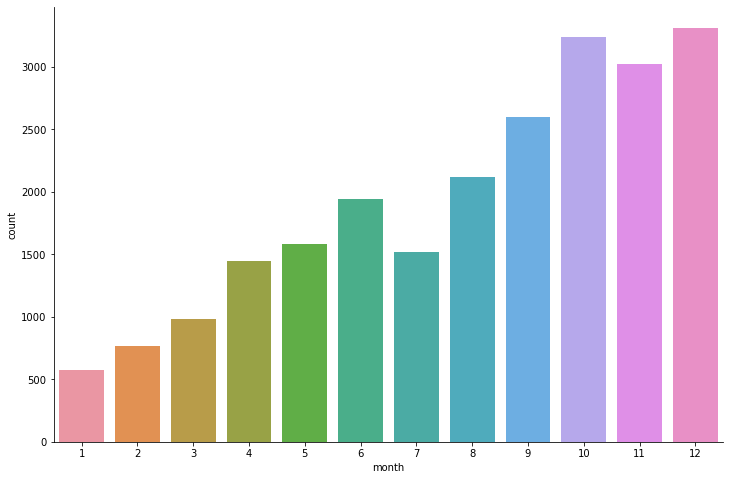

In [124]:
plt.figure(figsize = (12,8))
sns.countplot(taxi.month)
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

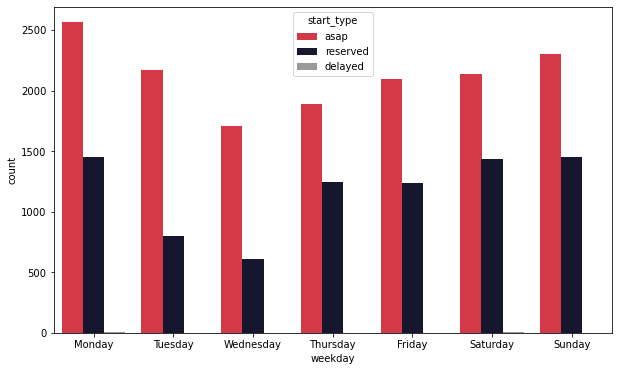

In [139]:
plt.figure(figsize = (10,6))
sns.countplot('weekday',data = taxi
            , order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            , hue = 'start_type'
            , palette =['#ed1f32','#121233','#999999'])

In [145]:
mau = (
    taxi.groupby('month',as_index=False)\
        .agg({'user_id': lambda x: x.nunique()})\
)

In [158]:
xt = range(1,13)

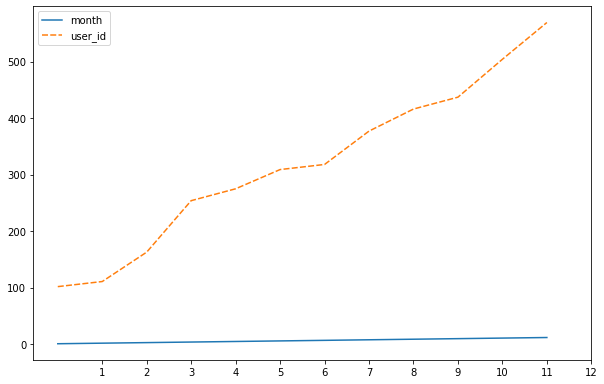

In [160]:
plt.figure(figsize = (10,6.5))
sns.lineplot(data=mau)
plt.xticks(xt);